## Importing Libraries.
Load  TechFest dataset using pandas.<br>
Doing math (like averages, standard deviation) with numpy.<br>
Create plots like histograms, bar charts, boxplots with matplotlib and seaborn.<br>
KMeans is a clustering algorithm from scikit-learn that groups data points into a set number (k) of clusters based on their similarity.<br>
In your dataset, we can use KMeans to group customers into segments (e.g., high spenders, average spenders, low spenders) without needing predefined labels.<br>
StandardScaler standardizes the data by removing the mean and scaling to unit variance.<br>
Before applying PCA or clustering, we scale numeric columns so that large values don’t dominate the results.<br>
silhouette_score measures how similar a data point is to its own cluster compared to other clusters.<br>
Helps us evaluate how good our customer segments (clusters) are after applying KMeans.<br>
sklearn.decomposition import PCA is Principal Component Analysis reduces the number of variables in the dataset while preserving as much information as possible.<br>
sklearn.decomposition import FactorAnalysis is Factor Analysis finds hidden “factors” that explain the observed relationships among variables.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis


### Importing CSV.
Here the CSV file is imported to read data.<br>

In [2]:
df = pd.read_csv('Mall_Customers_with_Dates.csv', parse_dates=['Purchase_Date'])

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Purchase_Date
0,109,Male,68,63,43,2023-01-06
1,87,Female,55,57,58,2023-01-09
2,197,Female,45,126,28,2023-01-09
3,66,Male,18,48,59,2023-01-09
4,103,Male,67,62,59,2023-01-17


In [3]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Purchase_Date
195,105,Male,49,62,56,2024-12-19
196,81,Male,57,54,51,2024-12-20
197,61,Male,70,46,56,2024-12-23
198,102,Female,49,62,48,2024-12-27
199,63,Female,67,47,52,2024-12-30


### Shape.
It shows the shape of data (like: how many Rows and Coloums are used in dataset).<br>

In [4]:
df.shape

(200, 6)

### DataType 
Shows the datatype of each coloum in dataset.<br>

In [5]:
df.dtypes

CustomerID                         int64
Genre                             object
Age                                int64
Annual Income (k$)                 int64
Spending Score (1-100)             int64
Purchase_Date             datetime64[ns]
dtype: object

### What it does:
We pick only the two columns:<br>
Annual Income (k$) → tells us how much a customer earns per year.<br>
Spending Score (1-100) → a score assigned based on their purchasing behavior and loyalty.<br>
These two features are important for clustering customers into segments (like low-income/high-spending, high-income/low-spending, etc.).<br>
### Why we do this:
Using only relevant features makes the clustering more meaningful and removes noise from unrelated data.<br>

scaler = StandardScaler()<br>
X_scaled = scaler.fit_transform(X)<br>
### What it does:
StandardScaler transforms the data so each feature has:<br>
Mean = 0<br>
Standard Deviation = 1<br>
This ensures both features are on the same scale, preventing one from dominating the clustering process.<br>
### Why it matters:
Without scaling, a feature like Annual Income (ranging in thousands) would overshadow Spending Score (ranging only from 1 to 100).<br>
Scaling gives equal importance to both features.<br>

X_scaled[:5]<br>
### What it does:
Shows the first 5 rows of the scaled dataset.<br>
Values are no longer in original units — instead, they are standardized values (z-scores).<br>
### Why it matters:
Helps confirm that scaling worked:<br>
Values are centered around 0.<br>
Large positive or negative numbers show how far they are from the mean.<br>

### Summary.
This code selects important customer features and scales them so they are ready for clustering (e.g., KMeans). Standardization is a crucial preprocessing step for almost all machine learning models that rely on distances.

In [6]:
features = [ 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]


array([[ 0.09313341, -0.27951524],
       [-0.13588317,  0.30280817],
       [ 2.49780745, -0.86183865],
       [-0.47940803,  0.34162973],
       [ 0.05496398,  0.34162973]])

### Purpose of the Code
This code is finding the optimal number of clusters for K-Means clustering using the Elbow Method.<br>
Clusters help group similar customers together based on their Annual Income and Spending Score.<br>
Choosing the right number of clusters (k) is important so the groups are meaningful and not too many or too few.<br>
## Working.
for k in range(1, 11):<br>
    kmeans = KMeans(n_clusters=k, random_state=42)<br>
    kmeans.fit(X_scaled)<br>
    wcss.append(kmeans.inertia_)<br>
wcss measures how compact the clusters are.<br>
Smaller WCSS → points in a cluster are closer to each other → better clustering.<br>
The loop:<br>
Runs K-Means for k = 1 to 10 clusters.<br>
Fits the model to the scaled data (X_scaled).<br>
Saves the WCSS value for each k.<br>
### Why we do this:
To see how WCSS changes as we increase the number of clusters.<br>
### Plot.
plt.figure(figsize=(8, 5))<br>
plt.plot(range(1, 11), wcss, marker='o')<br>
plt.title('Elbow Method for Optimal k')<br>
plt.xlabel('Number of clusters (k)')<br>
plt.ylabel('WCSS')<br>
plt.grid(True)<br>
plt.show()<br>
Elbow Curve:<br>

Plots Number of Clusters (k) on the X-axis.<br>
Plots WCSS on the Y-axis.<br>
Shape looks like an "arm" — the elbow point is where WCSS stops decreasing sharply.<br>
How to choose optimal k:<br>
Look for the bend/elbow point.<br>
That k is the best balance between accuracy and simplicity.<br>

### Summary:
This code uses the Elbow Method to decide the optimal number of clusters for grouping customers. The elbow point shows where adding more clusters no longer significantly improves the model.

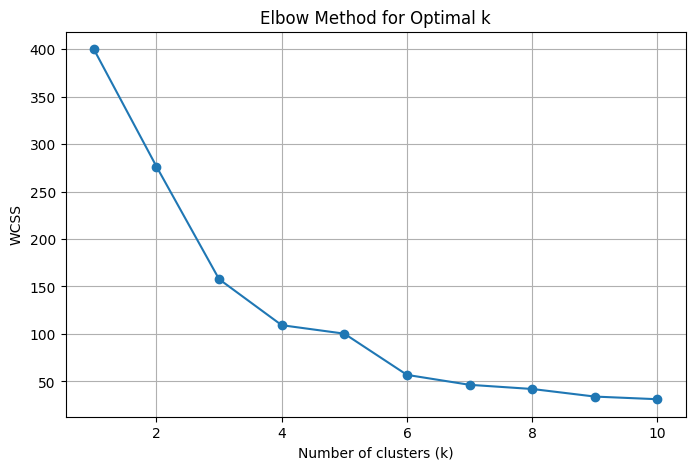

In [7]:
# Find optimal number of clusters using the Elbow method
wcss = []  # Within-Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


### Purpose of the Code
This code is finding the optimal number of clusters (k) for K-Means clustering using the Silhouette Method.<br>
The Silhouette Score measures how well-separated and well-formed the clusters are.<br>
Higher score → better clustering.<br>
### Working.
silhouette_scores = []<br>
for k in range(2, 11):  # silhouette is undefined for k=1<br>
    kmeans = KMeans(n_clusters=k, random_state=42)<br>
    cluster_labels = kmeans.fit_predict(X)<br>
    score = silhouette_score(X_scaled, cluster_labels)<br>
    silhouette_scores.append(score)<br>
Why start from k=2?<br>
Silhouette score compares distances between clusters, so it’s meaningless if there’s only 1 cluster.<br>
#### Step-by-step:
Loop through k = 2 to 10.<br>
Apply K-Means clustering for that k.<br>
fit_predict() assigns each data point to a cluster.<br>
silhouette_score() calculates:<br>
Cohesion → how close points in the same cluster are.<br>
Separation → how far apart points from different clusters are.<br>
Store the score in the list.<br>
### Plot.
plt.figure(figsize=(8, 4))<br>
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')<br>
plt.title('Silhouette Method for Optimal k')<br>
plt.xlabel('Number of clusters (k)')<br>
plt.ylabel('Silhouette Score')<br>
plt.grid(True)<br>
plt.show()<br>
Silhouette Curve:<br>
X-axis → Number of clusters (k).<br>
Y-axis → Silhouette Score.<br>
Peak point → Best k value.<br>
How to choose optimal k:<br>
Pick the k with the highest Silhouette Score (usually between 0.5 and 1 means strong clustering).<br>


### Summary:
This code tests different k values and measures how well the clusters are formed using the Silhouette Method.
It helps choose the k where clusters are both tight internally and well-separated from each other.

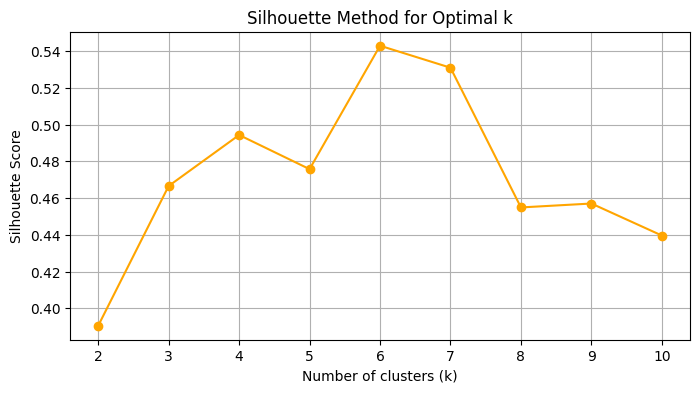

In [8]:
silhouette_scores = []

for k in range(2, 11):  # silhouette is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


### Purpose of the Code
This code uses K-Means clustering to group the customers from "Mall_Customers_with_Dates.csv" into 6 distinct segments based on similarities in their Annual Income and Spending Score.<br>
Each customer is assigned a Cluster number which identifies their group.<br>
### Working.
kmeans = KMeans(n_clusters=6, random_state=42)<br>
n_clusters=6 → We’re asking K-Means to create exactly 6 customer groups.<br>

random_state=42 → Ensures the clustering results remain the same every time we run the code.<br>

df['Cluster'] = kmeans.fit_predict(X_scaled)<br>
fit_predict():<br>

Fit → Finds the optimal position for 6 cluster centers in the scaled data.<br>

Predict → Assigns each customer to their nearest cluster center.<br>

df['Cluster'] → Adds a new column to our dataframe showing which cluster each customer belongs to.<br>

df.head()<br>
Displays the first 5 rows so we can verify that the new Cluster column is correctly added.<br>
### Why This Matters
Customers in the same cluster share similar spending habits and income levels.<br>
These clusters can be used for:<br>
Targeted marketing (e.g., special offers for high spenders).<br>
Customer behavior analysis (who spends the most vs. least).<br>
Strategic decision-making for the mall management.<br>





### Summary:
We successfully grouped all customers in "Mall_Customers_with_Dates.csv" into 6 segments using K-Means clustering. Each segment represents customers with similar income and spending profiles, making it easier to design personalized strategies for each group.


In [9]:
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Purchase_Date,Cluster
0,109,Male,68,63,43,2023-01-06,0
1,87,Female,55,57,58,2023-01-09,0
2,197,Female,45,126,28,2023-01-09,4
3,66,Male,18,48,59,2023-01-09,0
4,103,Male,67,62,59,2023-01-17,0


### Purpose of the Code
This code creates a scatter plot to visually display the customer segments formed by K-Means clustering.<br>
It shows:<br>
Customer distribution in terms of Annual Income and Spending Score.<br>
Centroid positions for each cluster, which represent the "center" or average of each group.<br>
### Working.
for cluster in df['Cluster'].unique():
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Annual Income (k$)'],
                cluster_points['Spending Score (1-100)'],
                label=f'Cluster {cluster}',
                s=50)<br>
Loops through each cluster in the dataset.<br>
Plots the customers belonging to that cluster in different colors for easy identification.<br>
s=50 sets the marker size for better visibility.<br>


centers = kmeans.cluster_centers_<br>
centers_original = scaler.inverse_transform(centers)<br>
plt.scatter(centers_original[:, 0], centers_original[:, 1],<br>
            c='black', marker='X', s=200, label='Centroids')<br>
kmeans.cluster_centers_ → Gives the location of each cluster center in scaled form.<br>

scaler.inverse_transform() → Converts the scaled coordinates back to the original values (Annual Income & Spending Score).<br>

Plots these centroids as large black 'X' markers, making them easy to spot.<br>


plt.title('K-Means Clustering of Customers')<br>
plt.xlabel('Annual Income (k$)')<br>
plt.ylabel('Spending Score (1-100)')<br>
plt.legend()<br>
plt.grid(True)<br>
plt.show()<br>
Adds a title, axis labels, legend, and grid for clarity.<br>
Displays the final clustering visualization.<br>

#### Why This Matters
Clusters: Each color group represents customers with similar income and spending habits.<br>
Centroids: Show the "average" customer in each cluster — useful for targeting strategies.<br>
Insights:<br>
Some clusters may have high income but low spending (potential to increase sales).<br>
Others may have low income but high spending (frequent shoppers).<br>

###  Summary:
This scatter plot makes the results of K-Means clustering visually clear. Each customer group is distinctly colored, and the black 'X' centroids help identify the center point of each group. This visualization helps businesses understand customer segments and plan personalized marketing or sales strategies accordingly.

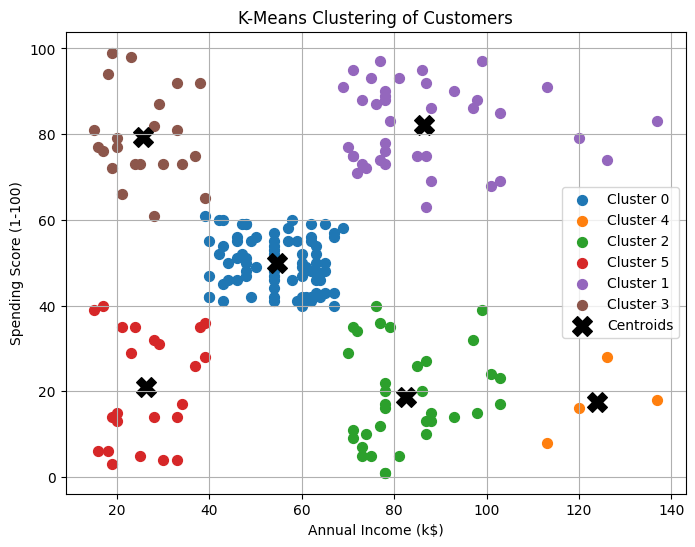

In [10]:
# Scatter plot for K-Means Clustering visualization
plt.figure(figsize=(8, 6))

# Plot each cluster
for cluster in df['Cluster'].unique():
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Annual Income (k$)'],
                cluster_points['Spending Score (1-100)'],
                label=f'Cluster {cluster}',
                s=50)

# Plot centroids
centers = kmeans.cluster_centers_
# Transform back to original scale for plotting
centers_original = scaler.inverse_transform(centers)
plt.scatter(centers_original[:, 0], centers_original[:, 1],
            c='black', marker='X', s=200, label='Centroids')

# Titles and labels
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


### Purpose of the Code
This code calculates the average Annual Income and average Spending Score for each customer cluster formed by K-Means.<br>
It helps us understand the typical characteristics of customers in each cluster.<br>
### Working.
cluster_summary = df.groupby('Cluster')[features].mean().reset_index()<br>
df.groupby('Cluster') → Groups the dataset by the cluster number assigned to each customer.<br>

[features] → Selects the relevant numeric features:<br>

Annual Income (k$)<br>
.Spending Score (1-100)<br>
.mean() → Calculates the average value of these features for each cluster.<br>
.reset_index() → Resets the index so the results are displayed in a clean tabular format.<br>

cluster_summary<br>
Displays the table showing average income and spending score for each cluster.<br>

### Why This Matters
Cluster Profiling: Helps in describing each cluster in simple terms.<br>
For example:<br>
Cluster 0 → High income, low spending<br>
Cluster 1 → Low income, high spending<br>
Cluster 2 → Moderate income, moderate spending<br>

Business Insights:<br>
Identify high-value customers (high income + high spending).<br>
Spot budget-conscious customers (low spending despite high income).<br>
Understand loyal frequent shoppers (moderate income, high spending).<br>

###  Summary:
This step translates the abstract cluster numbers into meaningful customer profiles by summarizing their average income and spending behavior. These insights can guide marketing strategies, promotions, and customer relationship management.

In [11]:
# Cluster-wise statistics
cluster_summary = df.groupby('Cluster')[features].mean().reset_index()
cluster_summary


,Cluster,Annual Income (k$),Spending Score (1-100)
0,0,54.615385,50.025641
1,1,86.538462,82.128205
2,2,82.647059,18.764706
3,3,25.727273,79.363636
4,4,124.000000,17.500000
5,5,26.304348,20.913043


### Purpose of the Code
This code:<br>
Creates a K-Means clustering model using a chosen number of clusters (n_clusters=4 in this case).<br>
Assigns each customer to one of the clusters.<br>
Counts how many customers fall into each cluster.<br>
This helps us understand how customers are distributed across clusters.<br>
### Working.
kmeans = KMeans(n_clusters=4, random_state=42)<br>
n_clusters=4 → We decided to divide the customers into 4 distinct groups based on their income and spending score.<br>
random_state=42 → Ensures reproducibility so the clustering results are the same every time the code runs.<br>

df['Cluster'] = kmeans.fit_predict(X_scaled)<br>
fit_predict():<br>

Fit → Finds 4 cluster centers in the scaled feature space.<br>
Predict → Assigns each customer to the nearest cluster center.<br>
The assigned cluster number (0, 1, 2, or 3) is stored in a new column Cluster in the dataset.<br>

df['Cluster'].value_counts()
Counts how many rows (customers) are assigned to each cluster.<br>
Gives an idea of cluster size — some clusters might have more customers, while others are small and specialized.<br>
### Why This Matters
Customer Segmentation → Allows businesses to identify different types of customers.<br>
Balanced vs. Imbalanced Clusters →<br>
Large clusters may represent common customer profiles.<br>
Small clusters may represent niche or premium customers.<br>
Marketing Strategy → Cluster sizes help decide how to allocate resources — e.g., focus on the largest group or target a small high-value segment.<br>

### Summary:
This step applies K-Means to group customers into 4 distinct segments and checks how many customers belong to each group. It’s an important step for understanding customer distribution before analyzing their characteristics.

In [12]:
# Create KMeans model with chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View cluster counts
df['Cluster'].value_counts()


Cluster
0    101
1     39
2     38
3     22
Name: count, dtype: int64

### Purpose of the Code
This code calculates the average (mean) of each selected feature (Annual Income and Spending Score) for every cluster.<br>
It creates a cluster profile table that helps us describe each group’s typical customer.<br>
### cluster_profile = df.groupby('Cluster')[features].mean().reset_index()<br>
df.groupby('Cluster') → Groups the data based on the cluster number assigned by K-Means.<br>

[features] → Only considers the features we clustered on:<br>

Annual Income (k$)<br>
Spending Score (1-100)<br>
.mean() → Calculates the average values for these features in each cluster.<br>
.reset_index() → Converts the grouped result back into a clean DataFrame for display.<br>

cluster_profile<br>
Displays a table where:<br>
Rows = Clusters (0, 1, 2, …)<br>
Columns = Mean Annual Income & Mean Spending Score for that cluster.<br>
### Why This Matters
Customer Characterization → Helps us describe each cluster, e.g.:<br>
Cluster 0: High income, high spending → “Premium Shoppers”<br>
Cluster 1: Low income, low spending → “Budget Customers”<br>
Business Insights → Lets companies design tailored marketing strategies for each segment.<br>
Comparison Across Clusters → Shows clear differences between groups.<br>


###  Summary:
This step summarizes each cluster’s average characteristics so we can understand what makes each group unique and use that knowledge for better decision-making.

In [13]:
# Calculate mean of each feature per cluster
cluster_profile = df.groupby('Cluster')[features].mean().reset_index()

# Display the profile table
cluster_profile


,Cluster,Annual Income (k$),Spending Score (1-100)
0,0,48.168317,43.396040
1,1,86.538462,82.128205
2,2,87.000000,18.631579
3,3,25.727273,79.363636


### Purpose of the Code
This code produces a comprehensive statistical summary for each cluster by calculating:<br>
Mean (average)<br>
Min (minimum)<br>
Max (maximum)<br>
Count (number of customers)<br>
It helps us get both the central tendencies and the spread of features inside each customer segment.<br>

### Working.
cluster_summary = df.groupby('Cluster')[features].agg(['mean', 'min', 'max', 'count']).reset_index()<br>
df.groupby('Cluster') → Groups all rows of the DataFrame according to their cluster label.<br>

[features] → Uses only the features we clustered on:<br>

Annual Income (k$)<br>
Spending Score (1–100)<br>
.agg([...]) → Runs multiple aggregation functions at once for each feature:<br>
'mean' → Average value in that cluster<br>
'min' → Lowest value in that cluster<br>
'max' → Highest value in that cluster<br>
'count' → Number of customers in that cluster<br>
.reset_index() → Converts the grouped data back into a standard DataFrame for clean output.<br>

cluster_summary<br>
Displays a table showing, for each cluster:<br>
Mean Annual Income & Spending Score<br>
Min Annual Income & Spending Score<br>
Max Annual Income & Spending Score<br>
Total customers in the cluster<br>


### Why This Matters
Detailed Profile → We not only see the average behavior of a cluster but also the range of values.<br>
Outlier Detection → Large gaps between min and max may suggest extreme values worth investigating.<br>
Customer Distribution → The count column shows how big or small each segment is.<br>
Marketing Strategy → This gives deeper insights for customized promotions based on both spending and income range.<br>
### Summary:
This step enhances the basic cluster profile by adding counts and ranges, giving a richer and more complete picture of each customer segment for targeted business actions.

In [14]:
# You can add additional info like counts, min, max
cluster_summary = df.groupby('Cluster')[features].agg(['mean', 'min', 'max', 'count']).reset_index()

# Show summary
cluster_summary


Cluster Annual Income (k$)                Spending Score (1-100)          \
                        mean min  max count                   mean min max   
0       0          48.168317  15   69   101              43.396040   3  61   
1       1          86.538462  69  137    39              82.128205  63  97   
2       2          87.000000  70  137    38              18.631579   1  40   
3       3          25.727273  15   39    22              79.363636  61  99   

         
  count  
0   101  
1    39  
2    38  
3    22

### Purpose of the Code
Before performing certain operations like statistical analysis, scaling, or clustering, we often need to filter only the numeric columns from a dataset. This step ensures that calculations and algorithms run only on valid numeric data, avoiding errors from text or categorical fields.<br>
### Working.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()<br>
df.select_dtypes() → A Pandas function that selects columns based on their data type.<br>
include=[np.number] → This tells Pandas to include only columns whose data type is numeric (integers and floats).<br>
.columns → Returns the column names of the selected numeric columns.<br>
.tolist() → Converts the list of column names from a Pandas Index object into a standard Python list for easier use.<br>
3. Output
numeric_cols will now store a Python list containing the names of all numeric columns in the DataFrame.<br>

Example:<br>
['Annual Income (k$)', 'Spending Score (1-100)', 'Age']<br>
###  Why This Matters.
Avoids Errors → Non-numeric columns like names or categories can’t be used in mathematical operations, so filtering avoids problems.<br>
Prepares Data for Machine Learning → Many ML algorithms (including K-Means) require only numeric features.<br>
Speeds Up Processing → Working with fewer, relevant columns reduces computational time.<br>

### Summary:
This step automatically identifies numeric columns in the dataset, ensuring that further analysis or machine learning models are applied only to valid numerical data without manual selection.

In [15]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

numeric_cols

['CustomerID',
 'Age',
 'Annual Income (k$)',
 'Spending Score (1-100)',
 'Cluster']

### Purpose of the Code
This step computes the average (mean) of each numeric column in the dataset, providing a quick summary statistic that represents the central tendency of your data. It’s useful for understanding the general scale and range of values before diving into deeper analysis.<br>
### Working.
overall_mean = df[numeric_cols].apply(np.mean).T<br>
df[numeric_cols] → Selects only the numeric columns from the DataFrame (previously stored in numeric_cols).<br>
.apply(np.mean) → Applies NumPy’s mean() function to each column, calculating the average value for that column.<br>
.T → Transposes the result, turning it from a horizontal (row) layout into a vertical (column) layout for easier reading.<br>

overall_mean = pd.DataFrame(overall_mean, columns=['overall_average'])<br>
pd.DataFrame(overall_mean, columns=[...]) → Converts the series of means into a DataFrame, naming the column "overall_average" for clarity.<br>
### Example
If your numeric columns were:<br>
Annual Income (k$)   Spending Score (1-100)   Age<br>
The output might look like:<br>

----------overall_average<br>
Annual Income (k$)---------60.35<br>
Spending Score(1-100)------50.45<br>
Age----------38.21<br>

### Why This Matters
Quick Summary Insight → Lets you see the average values of all numeric features in one place.<br>
Helps with Data Normalization Decisions → Large differences in averages might suggest scaling is needed.<br>
Reference for Comparison → Useful when comparing cluster-specific averages to the dataset’s overall averages.<br>
### Summary:
This code calculates the mean of all numeric columns and presents them in a clean, labeled DataFrame, making it easier to compare and interpret key metrics at a glance.

In [16]:
overall_mean = df[numeric_cols].apply(np.mean).T
overall_mean = pd.DataFrame(overall_mean, columns=['overall_average'])

overall_mean


,overall_average
CustomerID,100.500
Age,38.850
Annual Income (k$),60.560
Spending Score (1-100),50.200
Cluster,0.905


### Purpose of the Code
After calculating the overall averages for each numeric column, this step rounds those values to two decimal places.<br>
Rounding makes the results cleaner, easier to read, and avoids displaying unnecessary floating-point precision (like 45.6666667).<br>
### Working.
overall_mean['overall_average'] = overall_mean['overall_average'].round(2)<br>
overall_mean['overall_average'] → Selects the column containing the overall averages.<br>
.round(2) → Rounds each value in that column to two decimal places.<br>
Example:<br>
45.6666667 → 45.67<br>
72.12345 → 72.12<br>
overall_mean<br>
Displays the cleaned and rounded DataFrame.<br>
### Why Rounding is Important
Improves readability → Shorter, cleaner numbers are easier to interpret.<br>
Consistent format → All values show the same number of decimal places, making tables look professional.<br>
Avoids false precision → In real-world data, showing 10 decimal places implies a precision that usually isn’t meaningful.<br>
### Summary:
This step takes the calculated averages from your dataset and rounds them to two decimal places for better presentation and readability, without affecting the overall interpretation of your analysis.

In [17]:
overall_mean['overall_average'] = overall_mean['overall_average'].round(2)
overall_mean


,overall_average
CustomerID,100.50
Age,38.85
Annual Income (k$),60.56
Spending Score (1-100),50.20
Cluster,0.90


### Purpose of the Code
This code is designed to:<br>
Identify all numeric columns in the dataset.<br>
Remove identifier columns (like CustomerID) that are numeric but not useful for analysis.<br>
### Working.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()<br>
df.select_dtypes(include=[np.number]) → Selects all columns in the DataFrame that contain numeric data (integers or floats).<br>
.columns.tolist() → Converts the column names from an Index object to a Python list for easier manipulation.<br>

if 'CustomerID' in numeric_cols:<br>
    numeric_cols.remove('CustomerID')<br>
Why remove CustomerID?<br>
CustomerID is a unique identifier, not a feature describing customer behavior.<br>
Including it in clustering or statistical calculations would be meaningless because it doesn’t carry analytical value.<br>
Condition check ensures removal only if the column exists.<br>
### Why This Step is Important in Clustering & Analysis
Prevents irrelevant numeric data from influencing clustering results.<br>
Keeps only meaningful numeric features for algorithms like K-Means, PCA, or statistical summaries.<br>
### Summary:
This code automatically finds all numeric columns in your dataset, removes ID-type columns that are not analytically useful, and prepares a clean feature list for further analysis or clustering.<br>

In [18]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID if present
if 'CustomerID' in numeric_cols:
    numeric_cols.remove('CustomerID')

numeric_cols


['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']

### Purpose of the Code
This code is standardizing all the numeric columns (after removing irrelevant ones like CustomerID) so that:<br>
All features are on the same scale.<br>
No single feature dominates the clustering or analysis just because of its larger numerical range.<br>
### Working.
scaler = StandardScaler()<br>
Creates an instance of StandardScaler from sklearn.preprocessing.<br>
This scaler transforms each numeric feature to have:<br>
Mean = 0
Standard deviation = 1<br>

N_scaled = scaler.fit_transform(df[numeric_cols])<br>
fit_transform() does two things:<br>
fit() → Calculates the mean and standard deviation for each numeric column.<br>
transform() → Uses those values to standardize each column.<br>
### Why Standardization is Important for Clustering
Many clustering algorithms (like K-Means) use distance-based calculations.<br>
If one feature (e.g., Annual Income) has values in thousands and another (e.g., Spending Score) is between 1–100, the larger scale can dominate the clustering results.<br>
Standardization ensures equal contribution from all features regardless of their original scale.<br>
### Summary:
This step prepares numeric features for clustering by putting them all on a uniform scale, ensuring fairness in distance-based algorithms.<br>


In [28]:
scaler = StandardScaler()
N_scaled = scaler.fit_transform(df[numeric_cols])
N_scaled

array([[ 0.14722616,  2.091999  ,  0.09313341, -0.27951524, -0.85287268,
        -1.040833  ],
       [-0.23382978,  1.15903204, -0.13588317,  0.30280817, -0.85287268,
        -1.040833  ],
       [ 1.67144992,  0.44136514,  2.49780745, -0.86183865,  1.03192883,
         0.96076892],
       ...,
       [-0.68416862,  2.23553238, -0.55574689,  0.22516505, -0.85287268,
        -1.040833  ],
       [ 0.02598109,  0.7284319 ,  0.05496398, -0.08540743, -0.85287268,
        -1.040833  ],
       [-0.64952717,  2.02023231, -0.51757746,  0.06987881, -0.85287268,
        -1.040833  ]])

### Purpose of the Code
To group customers into 4 distinct clusters based on their numeric attributes (e.g., income, spending score, etc.).<br>
Clustering helps identify patterns or segments within the dataset.<br>
### Working.
kmeans = KMeans(n_clusters=4, random_state=42)<br>
Creates a K-Means clustering model from sklearn.cluster.<br>
n_clusters=4 → We want 4 customer groups.<br>
random_state=42 → Ensures reproducibility (same result every time the code runs).<br>
K-Means works by:<br>
Randomly selecting 4 initial centroids.<br>
Assigning each data point to the nearest centroid (based on Euclidean distance).<br>
Updating centroids as the mean of all points in the cluster.<br>
Repeating steps until assignments no longer change (convergence).<br>

df['cluster'] = kmeans.fit_predict(N_scaled)<br>
fit_predict():<br>
Fit → Runs the K-Means algorithm on the standardized numeric data (N_scaled).<br>
Predict → Assigns each customer to a cluster (0, 1, 2, or 3).<br>
Adds the cluster column to df indicating the cluster number for each row.<br>
df.head()<br>
Displays the first 5 rows of the DataFrame.<br>
 now see an additional cluster column showing the cluster assignment.<br>
 ### Why We Used Standardized Data
Clustering is distance-based, so large-scale variables (like income) could dominate without scaling.<br>
Using N_scaled ensures all variables contribute equally to the clustering process.<br>

### Summary:
We created a K-Means model with 4 clusters, fitted it to standardized customer data, and assigned each customer to a cluster for further analysis.


In [29]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(N_scaled)

df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Purchase_Date,Cluster,cluster
0,109,Male,68,63,43,2023-01-06,0,0
1,87,Female,55,57,58,2023-01-09,0,0
2,197,Female,45,126,28,2023-01-09,2,1
3,66,Male,18,48,59,2023-01-09,0,2
4,103,Male,67,62,59,2023-01-17,0,0


### Purpose of the Code
To find the overall average value of each numeric column in the dataset.<br>
Helps us understand general trends in the data before doing deeper analysis.<br>
### Working.
overall_mean = df[numeric_cols].mean()<br>
df[numeric_cols] → Selects only numeric columns from the DataFrame.<br>
.mean() → Calculates the average value for each numeric column.<br>

.to_frame(name='overall_average')<br>
Converts the result (which is a Series) into a DataFrame.<br>
Sets the column name to 'overall_average' for clarity.<br>
overall_mean<br>
Displays the DataFrame showing each numeric column and its corresponding overall average.<br>
### Summary:
This code calculates the overall average for every numeric feature in the dataset, helping us get a quick statistical summary of the dataset’s central tendency.

In [21]:
overall_mean = df[numeric_cols].mean().to_frame(name='overall_average')
overall_mean


,overall_average
Age,38.850
Annual Income (k$),60.560
Spending Score (1-100),50.200
Cluster,0.905


### Purpose of the Code
To compare clusters based on the average values of each numeric feature.<br>
This helps us understand how each cluster is different in terms of spending habits, income, or other numerical attributes.<br>
### Working.
df.groupby('cluster')[numeric_cols].mean()<br>
df.groupby('cluster') → Groups the dataset by the cluster column (created during K-Means clustering).<br>
[numeric_cols] → Selects only numeric features from the grouped data.<br>
.mean() → Calculates the average value of each numeric feature for each cluster.<br>

#### .T
Transposes the DataFrame (rows ↔ columns) so that:<br>
Rows represent features (e.g., Annual Income, Spending Score, etc.).<br>
Columns represent clusters (Cluster 0, Cluster 1, etc.).<br>
This makes it easier to compare feature averages across clusters.<br>

cluster_mean<br>
Displays the table of mean values per feature for each cluster.<br>
### Summary:
This calculation allows us to profile each cluster by its average numeric values, making it easier to label clusters (e.g., "High Income - Low Spending", "Low Income - High Spending").

In [22]:
cluster_mean = df.groupby('cluster')[numeric_cols].mean().T
cluster_mean


cluster,0,1,2,3
Age,50.540541,29.378788,40.394737,25.272727
Annual Income (k$),45.364865,73.984848,87.000000,25.727273
Spending Score (1-100),40.202703,69.863636,18.631579,79.363636
Cluster,0.000000,0.590909,2.000000,3.000000


### Purpose
To find the average value of each numeric feature for every cluster.<br>
To present the results in a way that makes comparison between clusters easier by showing features as rows.<br>
### Working.
df.groupby('cluster')<br>
Groups the dataset based on the cluster column created by K-Means clustering.<br>

Select Only Numeric Features<br>

[numeric_cols]<br>
Ensures that only numeric columns (e.g., Annual Income, Spending Score) are included in the calculation.<br>
Non-numeric data is excluded because mean values can’t be computed for text data.<br>

Calculate the Mean<br>
Calculates the average value for each numeric feature within each cluster.<br>
Transpose the Table<br>

.T:<br>
Switches rows and columns:<br>
Rows → become features.<br>
Columns → become clusters.<br>
This format makes it easier to visually compare how each feature differs across clusters.<br>
### Summary.
This code summarizes the characteristics of each cluster by showing their average numeric values, helping in customer profiling and business decision-making.

In [23]:
cluster_mean = df.groupby('cluster')[numeric_cols].mean().T

### Purpose
To calculate the average value of each numeric column across the entire dataset.<br>
This provides a baseline for comparing cluster-specific averages later.<br>
### Working.
df[numeric_cols]<br>
Filters the DataFrame so only numeric columns (e.g., Annual Income, Spending Score) are considered.<br>
This avoids errors from trying to average non-numeric data.<br>
Calculate Mean Across All Rows<br>

.mean()<br>
Computes the average of each numeric column for the entire dataset.<br>
Example:<br>
If Annual Income values are [40, 50, 60], mean = (40+50+60)/3 = 50.<br>
Convert Series to DataFrame<br>

.to_frame(name='overall_average')<br>
.mean() returns a Series (1D structure).<br>

.to_frame() converts it into a DataFrame (2D table) for easier reading and further processing.<br>
name='overall_average' sets the column name to "overall_average".<br>
### Summary.
This code creates a summary table showing the overall average values of numeric features in the dataset, which can later be compared to cluster-specific averages to see how each cluster stands out.<br>

In [24]:
overall_mean = df[numeric_cols].mean().to_frame(name='overall_average')


###  Purpose
To combine the cluster-wise averages and the overall averages into one table.<br>
This makes it easier to compare how each cluster’s characteristics differ from the entire dataset.<br>
### Working.
cluster_mean<br>
A DataFrame showing the mean value of each numeric feature for each cluster.<br>

Structure:<br>
                Cluster 0   Cluster 1   Cluster 2 ...<br>
Annual Income       ...        ...        ...<br>
Spending Score      ...        ...        ...<br>
overall_mean<br>

A DataFrame showing the overall average value of each numeric feature across all customers.<br>

Structure:<br>
                overall_average<br>
Annual Income        ...<br>
Spending Score       ...<br>
pd.concat([...], axis=1)<br>

pd.concat() joins DataFrames together.<br>
axis=1 → join side-by-side (columns).<br>
This aligns rows by their index (feature names), so both the cluster means and overall mean line up correctly.<br>
### Why This is Useful
Direct comparison:
can be instantly see if a cluster spends more or less than the average.<br>
Example:<br>
If Cluster 0 has an Annual Income much higher than the overall_average, you might label it “High-Income Shoppers”.<br>
Strategic decision-making:<br>
Helps in targeted marketing, promotions, and customer retention strategies.<br>
### Summary.
This code merges cluster-specific averages with the overall averages into one table, creating a powerful tool for understanding how each cluster differs from the general population.

In [25]:
cluster_vs_overall = pd.concat([cluster_mean, overall_mean], axis=1)
cluster_vs_overall


,0,1,2,3,overall_average
Age,50.540541,29.378788,40.394737,25.272727,38.850
Annual Income (k$),45.364865,73.984848,87.000000,25.727273,60.560
Spending Score (1-100),40.202703,69.863636,18.631579,79.363636,50.200
Cluster,0.000000,0.590909,2.000000,3.000000,0.905


### Purpose
Before running PCA (Principal Component Analysis), we must select only numeric columns from the dataset.<br>
wPCA works on numerical data because it uses mathematical operations like variance and covariance that cannot be directly applied to text or categorical values.<br>
### Working.
df.select_dtypes(include=[np.number])<br>
This selects only columns with numeric data types (e.g., int, float).<br>
Excludes any string, date, or categorical columns automatically.<br>
.columns.tolist()<br>
Extracts the column names and stores them in a Python list (numeric_cols).<br>
Useful to know exactly which columns will be used in PCA.<br>
print(...)<br>
Displays the numeric column names so you can confirm the correct variables are included.<br>
X = df[numeric_cols]<br>
Creates a new DataFrame X containing only numeric features.<br>
This filtered data will be passed to the PCA algorithm.<br>
X.head()<br>
Shows the first 5 rows of the numeric-only dataset for quick inspection.<br>
### Why This Step is Important for PCA
PCA cannot process non-numeric data without encoding.<br>
Reduces the risk of errors during transformation.<br>
Ensures that only relevant variables are analyzed, avoiding meaningless results from text-based fields.<br>
### Summary.
This step filters and prepares your dataset so PCA works only with numerical data, ensuring accurate and meaningful dimensionality reduction.

In [26]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numeric columns for PCA:", numeric_cols)



Numeric columns for PCA: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'cluster']


### Purpose
PCA (Principal Component Analysis) is used for dimensionality reduction — it transforms the original numeric variables into a new set of variables called Principal Components (PCs).<br>
Each principal component captures a portion of the variance (information) in the data, with PC1 capturing the most variance.<br>
### Working.
pca = PCA()<br>
Creates a PCA object from sklearn.decomposition.<br>
By default, it will compute all possible principal components based on the number of features in the dataset.<br>
pca.fit_transform(N_scaled)<br>
fit learns the PCA transformation based on the scaled data.<br>
transform applies this transformation to project the original data into the principal component space.<br>
N_scaled is used because PCA is sensitive to feature scales — hence standardization is essential.<br>
pca_components<br>
A NumPy array containing the transformed data in terms of principal components.<br>
Shape: (number_of_samples, number_of_original_features)<br>
pd.DataFrame(...)<br>
Converts PCA output into a DataFrame for easier analysis.<br>
columns=[f'PC{i+1}' for i in range(len(numeric_cols))] dynamically names the components PC1, PC2, PC3, etc.<br>
pca_df.head()<br>
Displays the first 5 rows of the PCA-transformed data.<br>
### Why PCA is Important
Reduces complexity while keeping most of the important information.<br>
Removes correlation between original features (components are orthogonal).<br>
Helps in visualization by reducing data to 2D or 3D.<br>
Useful for speeding up machine learning algorithms and avoiding overfitting.<br>
### Summary:
This code transforms your scaled numeric data into principal components, storing the results in a clean DataFrame so that you can easily analyze or visualize the reduced-dimension data.

In [30]:
pca = PCA()
pca_components = pca.fit_transform(N_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(
    pca_components,
    columns=[f'PC{i+1}' for i in range(len(numeric_cols))]
)

pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.799519,1.257318,-0.346485,1.156653,0.111026,0.079509
1,-1.534746,0.512100,0.408876,0.729146,0.001854,-0.048845
2,2.122055,2.381807,-1.177669,0.178597,0.164925,-0.579815
3,-0.207328,-0.950494,1.028752,-1.249251,0.324919,-0.026239
4,-1.694154,1.039312,0.176209,1.419720,0.124441,0.034705


### Purpose
After performing PCA, it is important to know how much information (variance) each Principal Component (PC) captures from the original dataset.<br>
Explained Variance Ratio tells us the proportion of total dataset variance explained by each PC.<br>
### Working.
explained_variance = pca.explained_variance_ratio_<br>
This attribute returns an array where each value represents the percentage of variance explained by the corresponding PC.<br>
Example: [0.55, 0.25, 0.12, 0.08] means:<br>
PC1 explains 55% of the variance.<br>
PC2 explains 25% of the variance.<br>
PC3 explains 12% of the variance.<br>
PC4 explains 8% of the variance.<br>
Plotting the Variance<br>
plt.plot(...) creates a line chart of the explained variance ratio for each principal component.<br>
marker='o', linestyle='--' adds circle markers and dashed lines for better visibility.<br>
plt.xlabel / plt.ylabel / plt.title label the chart for clarity.<br>
Interpreting the Graph<br>
The y-axis shows the variance ratio (0 to 1, where 1 = 100%).<br>
The x-axis represents the principal components in order of importance.<br>
A sharp drop after a certain PC suggests that adding more components gives little extra information — this is called the elbow point.<br>
Using the Information<br>
If PC1 + PC2 explain 90% of the variance, you might keep only those two for efficiency.<br>
This reduces the number of features while retaining most of the important information.<br>
### Why It’s Important
Prevents using unnecessary components that add noise.<br>
Helps in building faster models without losing much accuracy.<br>
Aids in visualization by choosing just 2 or 3 principal components.<br>

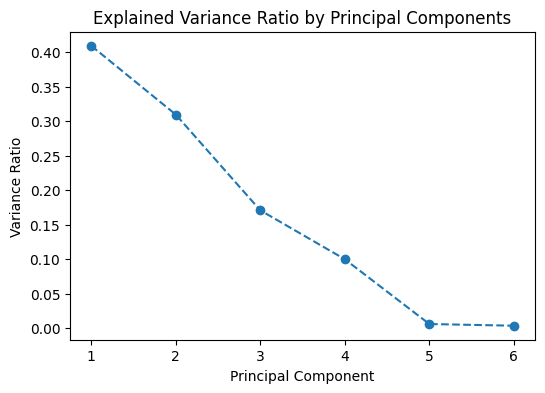

array([0.40954516, 0.30979548, 0.17095105, 0.10002238, 0.00607651,
       0.00360942])

In [31]:
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(6,4))
plt.plot(range(1, len(numeric_cols)+1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

explained_variance


### Purpose
After applying Principal Component Analysis (PCA), the transformed dataset is expressed in terms of Principal Components instead of original features.
Plotting PC1 vs PC2 allows us to:<br>
Visualize how the data is distributed in reduced dimensions.<br>
Identify clusters, patterns, or outliers.<br>
Understand whether separation between groups is possible.<br>
### Working.
plt.figure(figsize=(8,6))<br>
Creates a blank canvas of size 8 inches wide and 6 inches high.<br>
sns.scatterplot(...)<br>
Uses Seaborn to create a scatter plot.<br>
x=pca_df['PC1'] → x-axis will be the first principal component.<br>
y=pca_df['PC2'] → y-axis will be the second principal component.<br>
Each point represents one observation in the dataset, positioned based on its values in PC1 and PC2.<br>
plt.title(...)<br>
Adds the chart title “PCA Scatter Plot (PC1 vs PC2)” for clarity.<br>
plt.xlabel / plt.ylabel<br>
Labels the axes to indicate which principal component is being plotted.<br>
plt.show()<br>
Renders the plot.<br>
#### Interpreting the Scatter Plot
Dense clusters → may indicate natural groupings in the data.<br>
Clear separation between points → suggests strong variance captured by PC1 & PC2.<br>
Overlapping points → may require more PCs or different feature scaling.<br>
Outliers → points far from the rest might be anomalies or special cases.<br>
#### Why Use PC1 vs PC2?
PC1 captures the most variance in the data.<br>
PC2 captures the second most variance, orthogonal to PC1.<br>
Plotting them together shows the maximum spread of the dataset in two dimensions.<br>


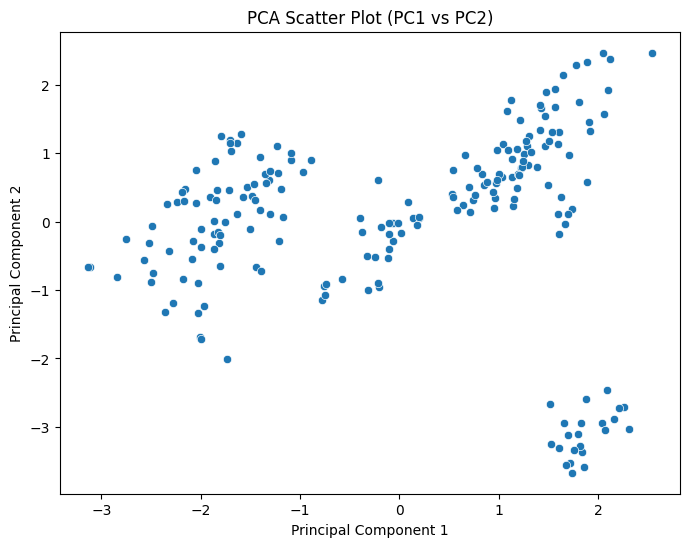

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_df['PC1'], 
    y=pca_df['PC2']
)
plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Purpose
In most machine learning and statistical techniques, we work with numeric data because:<br>
Algorithms like KMeans, PCA, Linear Regression require numerical input.<br>
Numeric columns can be directly scaled, standardized, and used in calculations.<br>
This code extracts all numeric features from the dataset for further processing.<br>
### Working.
numeric_cols = df.select_dtypes(include=[np.number]).columns<br>
df.select_dtypes(include=[np.number]) → selects only columns whose data type is numeric (int, float, etc.).<br>
.columns → retrieves just the column names (not the data).<br>
Result → numeric_cols will be a list-like object containing names of all numeric columns.<br>
print("Numeric columns:", numeric_cols)<br>
Displays which columns are numeric in the dataset.<br>
Useful for verifying the selection before processing.<br>
X = df[numeric_cols]
Creates a new DataFrame X containing only the numeric columns.<br>
This X will be used as input for modeling or transformations.<br>
X.head()<br>
Shows the first 5 rows of the numeric dataset for inspection.<br>
#### Why This Step is Important
Removes non-numeric data that could cause errors in numeric computations.<br>
Ensures clean and ready-to-process data for algorithms.<br>
Helps maintain focus only on features relevant for numerical analysis.<br>

In [33]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_cols)

X = df[numeric_cols]
X.head()


Numeric columns: Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Cluster', 'cluster'],
      dtype='object')


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,cluster
0,109,68,63,43,0,0
1,87,55,57,58,0,0
2,197,45,126,28,2,1
3,66,18,48,59,0,2
4,103,67,62,59,0,0


### Purpose
Principal Component Analysis (PCA) is a dimensionality reduction technique.<br>
This step applies PCA to the scaled numeric dataset and calculates how much variance each principal component explains.<br>
The explained variance ratio tells us the importance of each component in capturing the data’s information.<br>
### Working.
pca = PCA()<br>
Creates a PCA model object without limiting the number of components.<br>
By default, it will compute all possible principal components (equal to the number of features).<br>
pca.fit(X_scaled)<br>
Fits PCA on the standardized dataset (X_scaled).<br>
Standardization is important because PCA is sensitive to scale; features with larger values could dominate without scaling.<br>
explained_variance_ratio = pca.explained_variance_ratio_<br>
After fitting, this attribute stores the percentage of variance explained by each principal component.<br>
For example, if explained_variance_ratio_[0] = 0.45, then PC1 explains 45% of the total variance in the dataset.<br>
explained_variance_ratio<br>
Displays the array of variance ratios for all principal components.<br>
### Why This Step is Important
Helps determine how many components to keep while preserving most of the data’s information.<br>
Reduces complexity of the dataset while minimizing information loss.<br>
Useful for visualizing high-dimensional data in 2D or 3D.<br>

In [34]:
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio


array([0.50495142, 0.49504858])

### Purpose
This plot helps decide how many principal components (PCs) should be kept to retain most of the dataset’s variance.<br>
Shows both individual and cumulative variance explained by components.<br>
### Working.
plt.plot(..., explained_variance_ratio, ...)<br>
Plots a line graph showing how much variance each PC explains individually.<br>
Each point corresponds to a PC (PC1, PC2, etc.).<br>
plt.plot(..., np.cumsum(explained_variance_ratio), ...)<br>
Plots the cumulative variance, showing how variance adds up as we include more PCs.<br>
Helps identify the "elbow point" — where adding more components doesn’t significantly increase variance explained.<br>
marker='o' & marker='s'<br>
Circles (o) mark the individual explained variance points.<br>
Squares (s) mark the cumulative variance points for easy visual separation.<br>
Axis Labels & Title<br>
X-axis: Number of Principal Components.<br>
Y-axis: Explained variance ratio (as a fraction of total variance).<br>
The title clearly states that this is for choosing the number of PCs.<br>
plt.legend() & plt.grid(True)<br>
Legend distinguishes between individual and cumulative curves.<br>
Grid lines help to visually pinpoint variance thresholds.<br>
### Why This Step is Important
Prevents keeping unnecessary components, which keeps the model simpler and faster.<br>
Common practice is to keep enough components to explain 80–95% of the variance.<br>
The elbow method is often used here:<br>
Look for where the cumulative variance curve flattens out.<br>
Components after that point contribute very little to the information.<br>

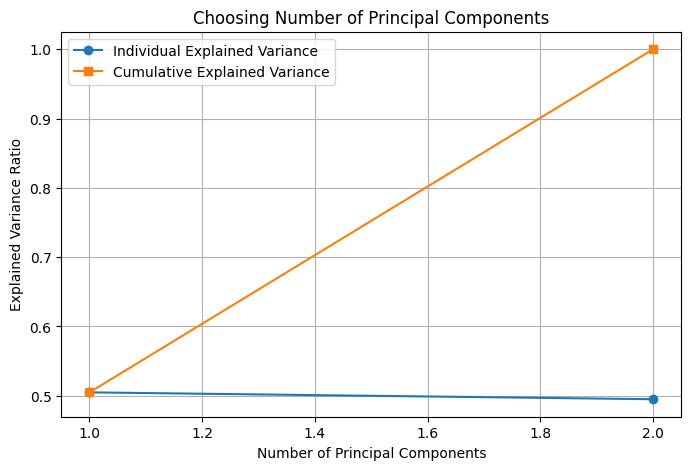

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1),
         explained_variance_ratio, marker='o', label='Individual Explained Variance')

plt.plot(range(1, len(explained_variance_ratio) + 1),
         np.cumsum(explained_variance_ratio), marker='s', label='Cumulative Explained Variance')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Choosing Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()


### Purpose
To determine the minimum number of principal components needed to capture at least 90% of the dataset’s total variance.<br>
This ensures dimensionality reduction while keeping most of the important information.<br>
### Working.
np.cumsum(explained_variance_ratio)<br>
Takes the cumulative sum of the explained variance ratio.<br>
Example: if the explained variance is [0.4, 0.3, 0.2, 0.1],<br>
the cumulative variance will be [0.4, 0.7, 0.9, 1.0].<br>
np.argmax(cumulative_variance >= 0.90)<br>
Finds the index of the first component where the cumulative variance reaches or exceeds 90%.<br>
np.argmax returns the first position where the condition is True.<br>
+ 1<br>
Since Python uses zero-based indexing, adding 1 converts it to the actual count of components.<br>
Result<br>
Prints: "Number of components to explain at least 90% variance: X"<br>
Where X is the minimum number of PCs needed.<br>
### Why This Step is Important
Using fewer components reduces:<br>
Computation time (faster models).<br>
Noise in the dataset.<br>
Ensures we retain most of the important patterns in the data while discarding redundant information.<br>


In [36]:
# Example: Keep enough components to explain at least 90% of the variance
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Number of components to explain at least 90% variance: {n_components_90}")


Number of components to explain at least 90% variance: 2


### Purpose
Before performing Principal Component Analysis (PCA), we need to ensure that the dataset only contains numeric values.<br>
PCA relies on mathematical operations like variance and covariance, which cannot be calculated for text or categorical data directly.<br>
### Working.
df.select_dtypes(include=[np.number])<br>
This selects only the columns in df whose data type is numeric (int, float, etc.).<br>
Non-numeric columns (e.g., names, dates, categories) are ignored.<br>
.columns<br>
Extracts the column names from the filtered DataFrame.<br>
X = df[numeric_cols]<br>
Creates a new DataFrame X containing only numeric columns.<br>
This ensures PCA gets valid input data.<br>
print(... .tolist())<br>
Converts the Index object (list of column names) into a standard Python list for easier reading.<br>
### Why This Step is Important
PCA only works with numerical data because it relies on matrix operations.<br>
Removing non-numeric columns ensures:<br>
No errors during transformation.<br>
Cleaner, more efficient computations.<br>

In [37]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
X = df[numeric_cols]

print("Numeric columns used for PCA:", numeric_cols.tolist())


Numeric columns used for PCA: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'cluster']


###  Purpose
Principal Component Analysis (PCA) is sensitive to the scale of features.<br>
If one feature has values in thousands and another in decimals, the larger-scaled feature will dominate the PCA results.<br>
To avoid this, we standardize the data so that each feature contributes equally.<br>
### Why Standardization is Important for PCA
PCA finds directions (principal components) of maximum variance.<br>
Without scaling:<br>
Features with larger numerical ranges dominate the variance.<br>
Smaller-scaled features might be ignored.<br>
Standardizing makes all features comparable, ensuring a fair contribution.<br>

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Purpose.
PCA transforms the original dataset into new variables called Principal Components (PCs).<br>
Each PC is a linear combination of the original features.<br>
Loadings tell us how much each original feature contributes to each principal component.<br>
### Working.
(a) pca = PCA()<br>
Creates a PCA object from sklearn.decomposition.<br>
No parameters → means we keep all components (same number as original features).<br>

(b) pca.fit(X_scaled)<br>
Fits the PCA model to the standardized dataset X_scaled.<br>
Internally, PCA:<br>
Calculates the covariance matrix.<br>
Finds eigenvectors (directions of maximum variance → PCs).<br>
Finds eigenvalues (variance explained by each PC).<br>

(c) pca.components_<br>
This gives a matrix where:<br>
Rows = Principal Components<br>
Columns = Original Features<br>
Each value represents the correlation/weight of that feature in that PC.<br>

(d) pca.components_.T<br>
Transposes the matrix so:<br>
Rows = Original Features<br>
Columns = Principal Components<br>
This makes it easier to read feature contributions.<br>

(e) Creating the DataFrame<br>
loadings = pd.DataFrame(
    pca.components_.T,        ( Transposed matrix)
    columns=[f"PC{i+1}" for i in range(len(numeric_cols))],  # PC1, PC2, ...
    index=numeric_cols       (Feature names)
)
Now each row shows one feature’s contribution across all PCs.<br>

### How to Interpret Loadings
High absolute value (close to +1 or -1) → strong influence on that PC.<br>
Positive value → the feature increases as the PC increases.<br>
Negative value → the feature decreases as the PC increases.<br>
Near zero → little contribution to that PC.<br>
### Why Loadings are Useful
Helps understand which features drive each principal component.<br>
Useful for:<br>
Feature selection.<br>
Interpreting the meaning of PCs.<br>
Visualizing important variables.<br>

In [39]:
# Fit PCA with all components
pca = PCA()
pca.fit(X_scaled)

# Create a DataFrame for PCA loadings (feature contributions)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(numeric_cols))],
    index=numeric_cols
)

loadings


,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,-0.147376,0.677302,0.029316,-0.067612,0.080065,0.712532
Age,-0.536471,-0.137768,-0.036522,0.647547,0.521512,0.024344
Annual Income (k$),-0.159212,0.672428,0.045270,-0.084831,0.155011,-0.699441
Spending Score (1-100),0.344657,0.092927,0.832832,0.415673,-0.078573,-0.003040
Cluster,0.405501,0.247965,-0.534918,0.619008,-0.321799,-0.034929
cluster,0.617990,0.000630,-0.126534,-0.113841,0.766719,0.035473


### Theory — Visualizing PCA Feature Contributions
1. loadings[['PC1', 'PC2']]<br>
From the PCA loadings DataFrame, we select only the first two principal components (PC1 and PC2).<br>
This is because PC1 and PC2 usually capture the most variance in the data.<br>

2. .plot(kind='bar')<br>
Creates a grouped bar chart where:<br>
X-axis = Features<br>
Y-axis = Loading score (feature's contribution to PC1 or PC2)<br>
Bars = Two bars per feature → one for PC1 and one for PC2.<br>

3. plt.title() / plt.ylabel() / plt.xticks()<br>
Title: Describes the chart.<br>
Y-axis label: Shows what the numbers mean (loading score).<br>
Rotation: Tilts feature names for readability.<br>
Grid: Adds horizontal lines for easier comparison.<br>
### How to Read the Chart
Tall positive bar → strong positive contribution.<br>
Tall negative bar → strong negative contribution.<br>
Short bar → minimal effect on that PC.<br>
If PC1 bars are large for certain features → those features are the main drivers of variance in dataset.<br>

<Figure size 1000x600 with 0 Axes>

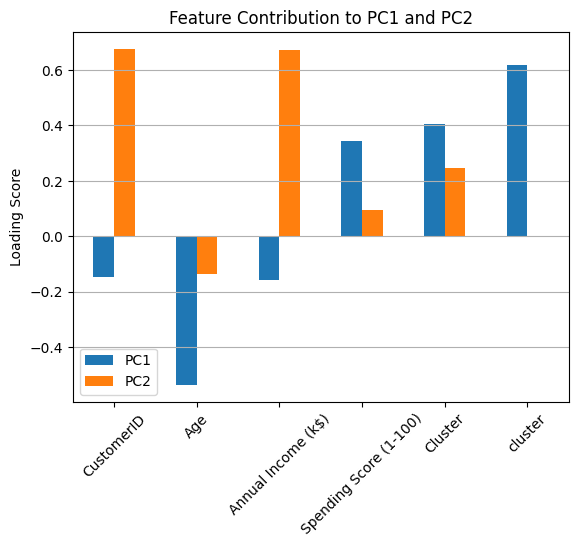

In [40]:
# Visualize contributions for first 2 PCs
plt.figure(figsize=(10, 6))
loadings[['PC1', 'PC2']].plot(kind='bar')
plt.title("Feature Contribution to PC1 and PC2")
plt.ylabel("Loading Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Explanation
1. explained_variance_ratio = pca.explained_variance_ratio_<br>
This is a NumPy array from the fitted PCA model.<br>
Each element = proportion of total variance explained by that principal component.<br>
Example: 0.45 means 45% of the dataset's variance is captured by that component.<br>
2. The loop;<br>
for i, var in enumerate(explained_variance_ratio, start=1):<br>
    print(f"PC{i}: {var:.2%} of variance explained")<br>
    
enumerate(..., start=1) → starts numbering from PC1 instead of PC0.<br>
{var:.2%} → formats as a percentage with two decimal places.<br>
Prints something like:<br>
PC1: 50.23% of variance explained<br>
PC2: 30.10% of variance explained<br>
...
3. Cumulative variance<br>
print(np.cumsum(explained_variance_ratio))<br>
np.cumsum() → running total of explained variance.<br>

This tells you how much total variance is explained if you keep adding PCs in order.<br>
Example output:<br>
[0.5023 0.8033 0.9001 0.9500]
→ Means:<br>
PC1 alone explains 50.23%<br>
PC1 + PC2 together explain 80.33%<br>
PC1 + PC2 + PC3 explain 90.01% (good threshold for dimensionality reduction)<br>

In [41]:
explained_variance_ratio = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var:.2%} of variance explained")

print("\nCumulative variance explained:")
print(np.cumsum(explained_variance_ratio))


PC1: 38.64% of variance explained
PC2: 33.94% of variance explained
PC3: 14.49% of variance explained
PC4: 9.93% of variance explained
PC5: 2.63% of variance explained
PC6: 0.36% of variance explained

Cumulative variance explained:
[0.38641455 0.72580474 0.87070779 0.97005535 0.99638484 1.        ]


### Purpose.
After performing PCA (Principal Component Analysis), each Principal Component (PC) is a combination of your original numeric features.<br>
The contribution of each feature to a PC is given by its loading score.<br>
A higher absolute loading score (positive or negative) means the feature has a stronger influence on that PC.<br>
We care about the absolute value because both strong positive and strong negative contributions are important.<br>
### What this code does
Create an empty dictionary<br>

top_features_per_pc = {}<br>
This will store the top 3 most important features for each PC.<br>
Loop through each Principal Component<br>

for i in range(len(numeric_cols)):<br>
len(numeric_cols) = number of numeric features = number of PCs.<br>
i is the PC index (PC1 = 0, PC2 = 1, etc.).<br>

Find and sort feature importance<br>
sorted_features = loadings.iloc[:, i].abs().sort_values(ascending=False).index<br>
loadings.iloc[:, i] → gets all loading scores for PC i.<br>

.abs() → converts them to absolute values.<br>
.sort_values(ascending=False) → ranks features from most to least important for that PC.<br>
.index → returns only the feature names.<br>

Select top 3 features<br>
top_features_per_pc[f"PC{i+1}"] = sorted_features[:3].tolist()<br>
f"PC{i+1}" → creates labels like "PC1", "PC2", etc.<br>
[:3] → picks the first 3 features (highest importance).<br>
.tolist() → converts them into a Python list.<br>

Display as a table
pd.DataFrame(top_features_per_pc)<br>
Shows the results where columns = PCs and rows = top features.<br>

### Why is this useful?
PCA reduces dimensionality, but interpretation can be tricky.<br>
By finding top contributing features, you can:<br>
Understand what each PC represents.<br>
Relate abstract PCs back to real-world variables.<br>
Help in feature selection and insights.<br>

In [42]:
# Find top contributing features for each PC
top_features_per_pc = {}
for i in range(len(numeric_cols)):
    sorted_features = loadings.iloc[:, i].abs().sort_values(ascending=False).index
    top_features_per_pc[f"PC{i+1}"] = sorted_features[:3].tolist()

pd.DataFrame(top_features_per_pc)


,PC1,PC2,PC3,PC4,PC5,PC6
0,cluster,CustomerID,Spending Score (1-100),Age,cluster,CustomerID
1,Age,Annual Income (k$),Cluster,Cluster,Age,Annual Income (k$)
2,Cluster,Cluster,cluster,Spending Score (1-100),Cluster,cluster


### Purpose.
Factor Analysis finds underlying patterns (factors) in data by looking at correlations between variables.<br>
Mathematical computations like covariance and eigenvalues only work on numbers.<br>
Text or categorical data needs to be converted to numbers first (e.g., one-hot encoding), otherwise it can’t be used here.<br>
### Working.
numeric_cols = df.select_dtypes(include=[np.number]).columns<br>
df.select_dtypes(include=[np.number]) → filters DataFrame to only numeric data types (int64, float64, etc.).<br>
.columns → returns only the column names.<br>

numeric_cols will be a list-like object containing those column names.<br>

2. Store numeric data separately<br>
N = df[numeric_cols]<br>
This creates a new DataFrame N containing only numeric columns for Factor Analysis.<br>

3. Show which columns will be used<br>
print("Numeric columns used for Factor Analysis:", numeric_cols.tolist())<br>
.tolist() converts the column names into a standard Python list.<br>
This helps confirm which variables will go into the analysis.<br>

### Why this matters for Factor Analysis
Ensures data compatibility with the algorithm.<br>
Avoids errors when running FA/PCA due to non-numeric types.<br>
Keeps the analysis focused on measurable quantities.<br>

In [43]:
# Select numeric columns for Factor Analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
N = df[numeric_cols]

print("Numeric columns used for Factor Analysis:", numeric_cols.tolist())


Numeric columns used for Factor Analysis: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'cluster']


### Purpose.
Why scaling is needed?<br>
In datasets, variables often have different units and ranges.<br>
Example:<br>
Presentation_Score → 0–10 range<br>
Number_of_Events → could be in hundreds<br>
If we don’t scale, features with larger values will dominate the Factor Analysis results, because the algorithm relies on variance and correlation.<br>
Scaling makes sure each feature contributes equally.<br>

fit() → calculates mean and standard deviation for each column.<br>
transform() → applies the scaling formula to each value.<br>
fit_transform() → does both in one step.<br>
X_scaled is now a NumPy array with standardized values.<br>
 ### Summary.
 Standardization is almost always required before PCA or Factor Analysis.<br>
Without it, results can be biased toward high-magnitude features.<br>

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Theory.
1. What is Factor Analysis?<br>
Goal: Reduce the number of observed variables into a smaller set of unobserved variables called factors.<br>
It assumes:<br>
Many observed variables are correlated because they are influenced by the same underlying factor.<br>
Example:<br>
Presentation_Score, Feedback_Rating, Communication_Score → could all be influenced by an underlying "Presentation Skill" factor.<br>

2. Why use Factor Analysis?<br>
To identify hidden patterns or latent variables.<br>
To reduce dimensionality while preserving the essence of the data.<br>
Often used in:<br>
Psychology (personality traits)<br>
Market research (customer behavior groups)<br>
Education (underlying abilities)<br>
### Working.
n_factors = len(numeric_cols)  # Here: starting with all numeric variables<br>
You can choose fewer factors later using criteria like:<br>
Eigenvalues > 1 rule (Kaiser criterion)<br>

Scree plot<br>

Variance explained percentage.<br>
fa = FactorAnalysis(n_components=n_factors, random_state=42)<br>
n_components → how many factors to extract.<br>

random_state → ensures reproducibility.<br>
fa.fit(N_scaled)<br>
Fits the Factor Analysis model to standardized data.<br>

Learns the relationships between observed variables and underlying factors.<br>
factor_loadings = pd.DataFrame(
    fa.components_.T,
    index=numeric_cols,
    columns=[f"Factor{i+1}" for i in range(n_factors)]
)<br>
Factor loadings = correlation coefficients between each variable and each factor.<br>
High loading (close to +1 or −1) means the variable is strongly associated with that factor.<br>
.T → transposes so rows = variables, columns = factors.<br>
### How to read factor loadings
Each row = one observed variable.<br>
Each column = one factor.<br>
The highest loading in a row usually indicates the factor that variable belongs to.<br>
### Key Difference from PCA:
PCA finds directions of maximum variance (purely mathematical).<br>
Factor Analysis tries to model underlying latent causes (statistical model).<br>

In [45]:
# Number of factors to extract (you can change this based on your data)
n_factors = len(numeric_cols)  # Start with all variables
fa = FactorAnalysis(n_components=n_factors, random_state=42)

# Fit the model
fa.fit(N_scaled)

# Get factor loadings
factor_loadings = pd.DataFrame(
    fa.components_.T,
    index=numeric_cols,
    columns=[f"Factor{i+1}" for i in range(n_factors)]
)

factor_loadings


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
CustomerID,0.560536,-0.648304,-0.014535,0.0,-0.0,-0.0
Age,-0.420087,-0.328325,0.295912,-0.0,0.0,-0.0
Annual Income (k$),0.540777,-0.663212,-0.017281,0.0,0.0,0.0
Spending Score (1-100),0.187152,0.150697,-0.376149,-0.0,0.0,-0.0
Cluster,0.729741,0.390698,0.128942,-0.0,-0.0,0.0
cluster,0.744060,0.427813,0.070493,0.0,0.0,-0.0


### Purpose
Factor loadings are numbers showing how strongly each observed variable is related to each factor.<br>
A bar plot helps:<br>
See which variables are most influenced by each factor.<br>
Quickly compare the strength of relationships.<br>
### Working.
factor_loadings.plot(kind='bar')<br>
Rows = your variables (numeric_cols).<br>
Columns = factors (Factor1, Factor2, …).<br>
Each colored bar = loading of a variable on a specific factor.<br>
### How to read the chart
Tall positive bars → strong positive relationship between variable and factor.<br>
Tall negative bars → strong negative relationship (inverse correlation).<br>
Near zero bars → little or no connection to that factor.<br>
Example interpretation:<br>
If Presentation_Score has a tall bar in Factor1 but near zero in others → Factor1 is likely a “Presentation Skills” factor.<br>
If Number_of_Events has a tall bar in Factor3 → Factor3 may represent “Engagement/Participation”.<br>
### Why this is useful
Makes factor interpretation more intuitive.<br>
Helps in naming factors (e.g., Factor1 = Skills, Factor2 = Participation, etc.).<br>
Aids in feature reduction by selecting variables with high loadings.<br>

<Figure size 1000x600 with 0 Axes>

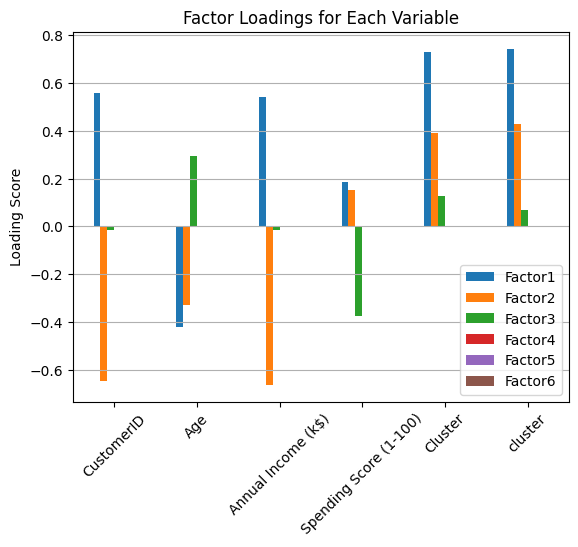

In [46]:
plt.figure(figsize=(10, 6))
factor_loadings.plot(kind='bar')
plt.title("Factor Loadings for Each Variable")
plt.ylabel("Loading Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Purpose.
In PCA, explained_variance_ratio_ is given directly by scikit-learn.<br>
In Factor Analysis, scikit-learn does not directly provide variance explained by each factor.<br>
Therefore, we estimate it manually.<br>
### Working.
variance_estimates = np.var(fa.transform(X_scaled), axis=0)<br>
fa.transform(X_scaled) → factor scores (representation of each observation in terms of extracted factors).<br>
np.var(..., axis=0) → variance for each factor.<br>

variance_ratio = variance_estimates / np.sum(variance_estimates)<br>
Dividing each factor’s variance by the total variance → proportion of variance explained by each factor.<br>

Interpretation<br>
Higher variance ratio → factor explains more variability in the dataset.<br>
Cumulative variance → total variance explained when factors are combined.<br>

Example:<br>
Factor1: 40%  <br>
Factor2: 25%  <br>
Factor3: 15% <br> 
...
Cumulative: 80%<br>
Means the first 3 factors explain 80% of the dataset’s variability.<br>
### Why this is important
Helps decide how many factors to keep.<br>
Prevents overfitting by removing less informative factors.<br>
Provides insight into the underlying structure of the data.<br>

In [47]:
# FactorAnalysis in sklearn doesn't directly give explained variance,
# but we can estimate using the variance of transformed data
variance_estimates = np.var(fa.transform(X_scaled), axis=0)
variance_ratio = variance_estimates / np.sum(variance_estimates)

for i, var in enumerate(variance_ratio, start=1):
    print(f"Factor{i}: {var:.2%} of variance explained")

print("\nCumulative variance explained:")
print(np.cumsum(variance_ratio))


Factor1: 38.25% of variance explained
Factor2: 49.60% of variance explained
Factor3: 12.15% of variance explained
Factor4: 0.00% of variance explained
Factor5: 0.00% of variance explained
Factor6: 0.00% of variance explained

Cumulative variance explained:
[0.38248222 0.87846038 1.         1.         1.         1.        ]


### Purpose
Identify key contributors → quickly see which variables are most representative of each factor.<br>
Support interpretation → helps you label factors meaningfully (e.g., “Engagement Factor” if top variables are related to participant involvement).<br>
Reduce noise → focus analysis on the most influential features.<br>
### Working.
top_vars_per_factor = {}<br>
This will store the top variables for each factor as {"Factor1": [...], "Factor2": [...], ...}.<br>

Loop through each factor<br>

for i in range(n_factors):<br>
The loop runs once for each factor you extracted (n_factors).<br>

Rank variables by their absolute loadings<br>

sorted_vars = factor_loadings.iloc[:, i].abs().sort_values(ascending=False).index<br>
factor_loadings.iloc[:, i] → gets all loadings for the current factor.<br>

.abs() → takes the absolute value (since negative loadings are also important in magnitude).<br>
.sort_values(ascending=False) → sorts from largest to smallest loading.<br>
.index → gives the variable names in ranked order.<br>

Select the top 3 variables<br>
sorted_vars[:3].tolist()<br>
Keeps the three highest-loading variables for the current factor.<br>

Store the result<br>
top_vars_per_factor[f"Factor{i+1}"] = sorted_vars[:3].tolist()<br>
Assigns the top 3 variables to the factor’s name.<br>

Convert to DataFrame for easy viewing<br>
pd.DataFrame(top_vars_per_factor)<br>
Displays a table showing which variables are most important for each factor.<br>

In [48]:
top_vars_per_factor = {}
for i in range(n_factors):
    sorted_vars = factor_loadings.iloc[:, i].abs().sort_values(ascending=False).index
    top_vars_per_factor[f"Factor{i+1}"] = sorted_vars[:3].tolist()

pd.DataFrame(top_vars_per_factor)


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
0,cluster,Annual Income (k$),Spending Score (1-100),CustomerID,CustomerID,CustomerID
1,Cluster,CustomerID,Age,Age,Age,Age
2,CustomerID,cluster,Cluster,Annual Income (k$),Annual Income (k$),Annual Income (k$)


### Purpose
Identify relationships between variables.<br>
Detect multicollinearity (high correlation between predictors).<br>
Spot redundant features for dimensionality reduction.<br>
### Working.
numeric_df = df.select_dtypes(include=[np.number])<br>
Filters the dataset df to include only numerical variables.<br>
Excludes categorical columns, as correlation is defined for numeric data.<br>
Calculate correlation matrix<br>

correlation_matrix = numeric_df.corr()<br>
Computes the pairwise correlation between all numeric variables.<br>
numeric_df = df.select_dtypes(include=[np.number])<br>
Filters the dataset df to include only numerical variables.<br>

Excludes categorical columns, as correlation is defined for numeric data.<br>

Calculate correlation matrix<br>
correlation_matrix = numeric_df.corr()<br>
Computes the pairwise correlation between all numeric variables.<br>

In [49]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   
Cluster                   0.160252 -0.344539            0.130150   
cluster                  -0.198682 -0.745571           -0.208243   

                        Spending Score (1-100)   Cluster   cluster  
CustomerID                            0.013835  0.160252 -0.198682  
Age                                  -0.327227 -0.344539 -0.745571  
Annual Income (k$)                    0.009903  0.130150 -0.208243  
Spending Score (1-100)                1.000000  0.141000  0.364597  
Cluster                               0.141000  1.000000  0.559158  
cluster                               0.364597  0.559158  1.000000  


### Purpose.
This line is finding highly correlated relationships (but not perfect correlations) among the correlation coefficients themselves — which means it’s looking for patterns in how variables correlate with other variables.<br>
### Working.
1. correlation_matrix.corr()<br>
The first correlation_matrix already contains correlations between numeric variables.<br>
Running .corr() again calculates the correlation between the columns of the correlation matrix itself.<br>
This is not the same as the original correlations; it’s meta-correlation (correlation of correlations).<br>

2. (correlation_matrix.corr() > 0.9) & (correlation_matrix.corr() < 1)<br>
Creates a boolean mask where:<br>
> 0.9 → selects values with strong positive correlation.<br>
< 1 → excludes perfect correlation (self-correlation with itself).<br>

3. correlation_matrix.corr()[...]<br>
Applies the boolean mask to keep only values that match the criteria.<br>
Result:<br>
Shows True/False values where correlation is > 0.9 but not exactly 1.<br>
All other values become NaN or False.<br>
### Why It’s Important
This is usually used to detect redundancy:<br>
If two variables are very strongly correlated (> 0.9), one of them might be dropped to avoid multicollinearity in regression or PCA.<br>
Running .corr() twice is unusual — but here it’s more like a diagnostic trick to see if correlation patterns themselves are similar.<br>

In [50]:
correlation_matrix.corr()[(correlation_matrix.corr()>0.9) & (correlation_matrix.corr()<1)]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,cluster
CustomerID,NaN,NaN,0.999271,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN
Annual Income (k$),0.999271,NaN,NaN,NaN,NaN,NaN
Spending Score (1-100),NaN,NaN,NaN,NaN,NaN,NaN
Cluster,NaN,NaN,NaN,NaN,NaN,NaN
cluster,NaN,NaN,NaN,NaN,NaN,NaN


### Purpose.
A correlation matrix is a table showing the pairwise correlation coefficients between numeric variables in a dataset. The correlation coefficient (usually denoted as r) measures the strength and direction of a linear relationship between two variables:<br>
+1 → Perfect positive correlation (as one variable increases, the other also increases).<br>
-1 → Perfect negative correlation (as one variable increases, the other decreases).<br>
0 → No linear correlation between the variables.<br>
### Working.
plt.figure(figsize=(8, 6)) → Sets the size of the plot.<br>
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm") → Draws the heatmap:<br>
annot=True shows the actual correlation values on the heatmap.<br>
fmt=".2f" formats the values to 2 decimal places.<br>
cmap="coolwarm" uses a color gradient where warm colors represent positive correlations and cool colors represent negative correlations.<br>
plt.title() → Adds a title to the plot.<br>
plt.show() → Displays the plot.<br>
### Importance.
Quickly identify strong correlations (close to 1 or -1) that might indicate redundant features.<br>
Detect independent variables (correlation near 0) that can provide unique information.<br>
Helps in feature selection before building models or doing factor analysis/PCA.<br>

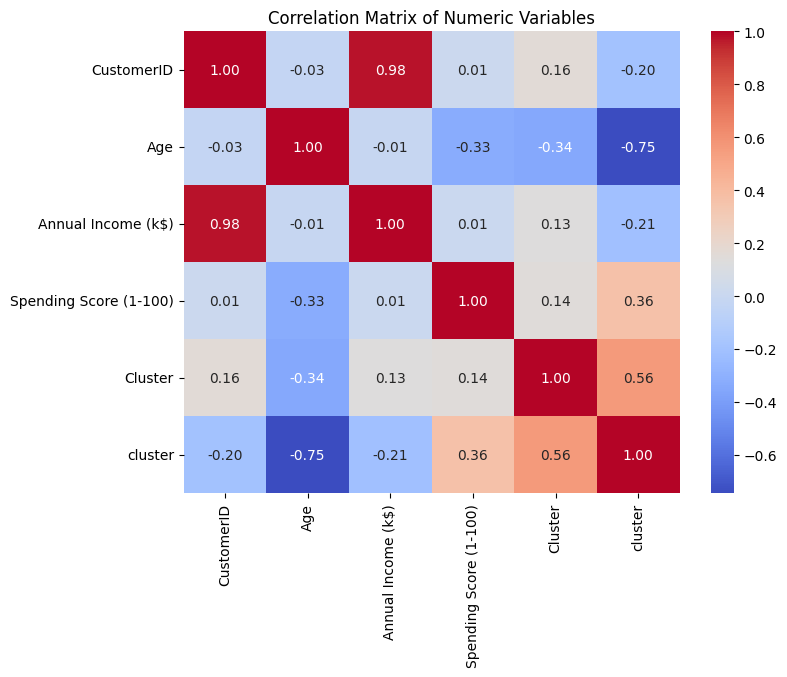

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()